# Introduction
* YOU HAVE TO run cell in "Download Images" to prepare images for the code following.



# 1. Download images 

In [1]:
%%shell

# RUN THIS CELL

###############################################################################################################
## Guidelines for sharing files
## 1. share a file (here, zip) with "anyone with link" in GoogleDrive
## 2. copy the link, here: https://drive.google.com/file/d/1qpoaVMI68ve23awAVAefM6352_1DE_rb/view?usp=sharing
## 3. extract the file-id, here: 1qpoaVMI68ve23awAVAefM6352_1DE_rb
## 4. download the file-id with gdown, as follows
###############################################################################################################

IMAGES="1qpoaVMI68ve23awAVAefM6352_1DE_rb"
cd /content/
rm -rf images.zip
rm -rf images
gdown -q --id $IMAGES --output images.zip
unzip -q images.zip
rm -rf images.zip

# 2. Create figures presented in slide "Chapter2"
## 2.1 Samples for slide 2.16

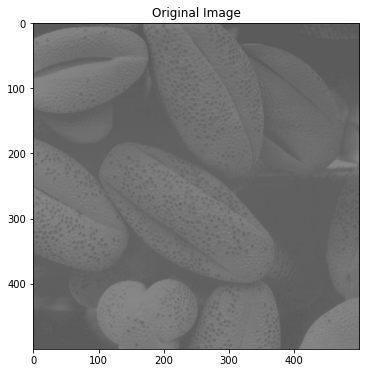

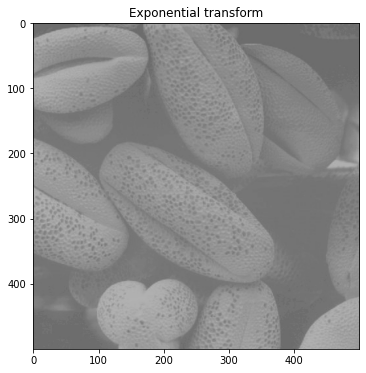

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
import math

def read_image(filename, color=True):
  return cv2.cvtColor(cv2.imread(filename, 1 if color else 0), cv2.COLOR_BGR2RGB)

"""
if image_data is in color format then RGB must be used
"""
def write_image(filename, image_data):
  image_data = cv2.cvtColor(image_data, cv2.COLOR_RGB2BGR)
  cv2.imwrite(filename, image_data)

def show_image(image, title="sample", figsize=(8,6), tickoff=False):
  plt.figure(figsize=figsize)
  if image.ndim == 2:
      plt.imshow(image, cmap="gray", norm=NoNorm())
  else:
      plt.imshow(image)
  plt.title(title)
  plt.show()


image_gray = read_image("./images/Fig3.15(a)3.jpg", color=False)
show_image(image_gray, "Original Image")

image_gray = image_gray/255.0 # => [0,1]
a, b = 1, -1
image_gray = (((a * np.exp(image_gray) + b)*255.0).clip(0,255)).astype(np.uint8)
show_image(image_gray, "Exponential transform")

## 2.2 Code for other figures

### 2.2.1 Slide 2.8 and 2.10: Linear transform



In [20]:
def linearTransform(image,a,b):
  result = ((a * image+ b).clip(0,255)).astype(np.uint8)
  return result

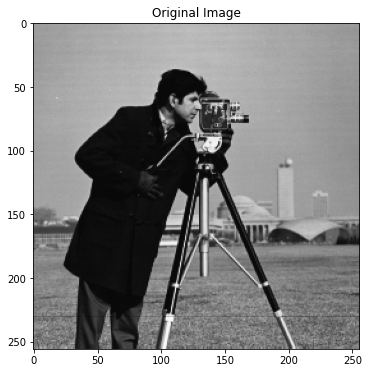

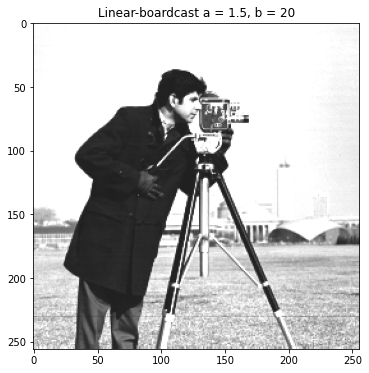

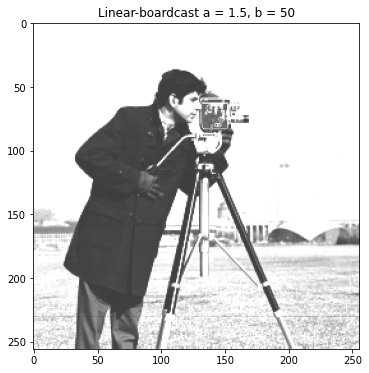

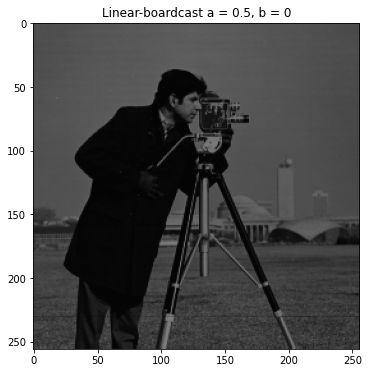

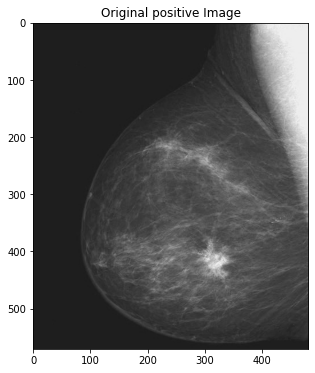

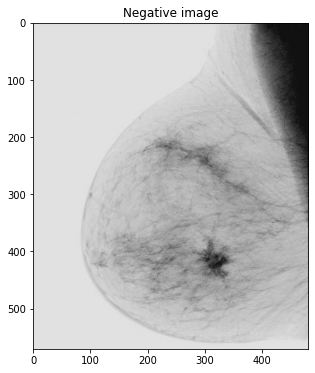

In [25]:
camera_man = read_image("./images/Fig2.22(b).jpg", color=False)
show_image(camera_man, "Original Image")
cmrM1 = linearTransform(camera_man,1.5,20)
show_image(cmrM1, "Linear-boardcast a = 1.5, b = 20")
cmrM2 = linearTransform(camera_man,1.5,50)
show_image(cmrM2, "Linear-boardcast a = 1.5, b = 50")
cmrM3 = linearTransform(camera_man,0.5,0)
show_image(cmrM3, "Linear-boardcast a = 0.5, b = 0")
breast = read_image("./images/Fig3.04(a).jpg", color=False)
show_image(breast, "Original positive Image")
show_image(linearTransform(breast,-1,255), "Negative image")

### 2.2.2 Slide 2.13: Logarithmic transform

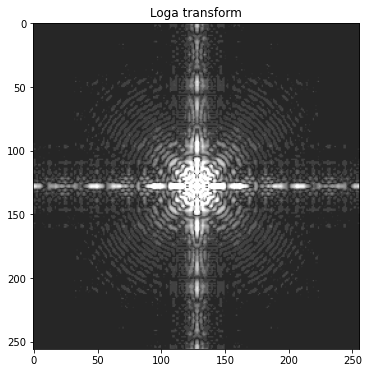

In [64]:
def logarith_trans(image,a,b):
  res = image/255.0 # => [0,1]
  res = (((a * np.exp(res) + b)*255.0).clip(0,255)).astype(np.uint8)
  return res

someBodyOnceToldMe = read_image("./images/Fig3.05(a).jpg", color=False)
show_image(someBodyOnceToldMe, "Before Loga transform")
TheWorldisGonnaRollMe = logarith_trans(someBodyOnceToldMe,9.15,-9)
show_image(TheWorldisGonnaRollMe, "Loga transform")

### 2.2.3 Slide 2.19: Power-law transform

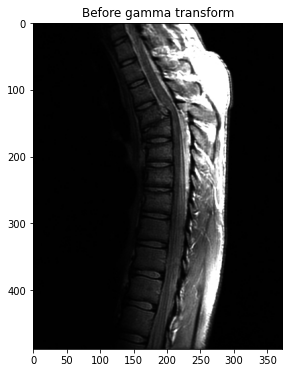

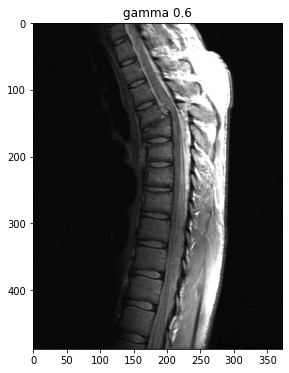

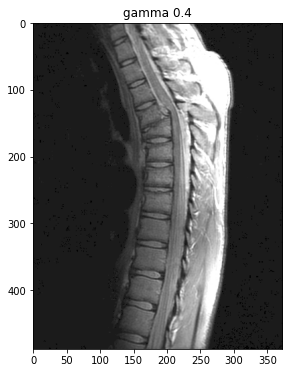

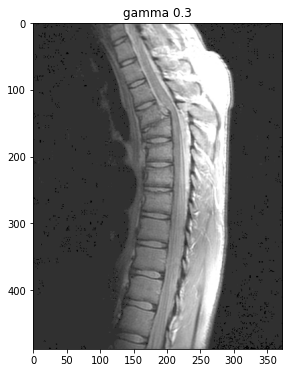

In [66]:
def power_trans(image,gamma):
  res = np.array(255*(image / 255) ** gamma, dtype = 'uint8')
  return res

strange_bone = read_image("./images/Fig3.08(a).jpg", color=False)
show_image(strange_bone, "Before gamma transform")
fixedbone1 = power_trans(strange_bone,0.6)
show_image(fixedbone1, "gamma 0.6")
fixedbone2 = power_trans(strange_bone,0.4)
show_image(fixedbone2, "gamma 0.4")
fixedbone3 = power_trans(strange_bone,0.3)
show_image(fixedbone3, "gamma 0.3")